<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/VocalSET/training3s_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X_train = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/features3s_train_mfcc.csv',header=None)

In [4]:
y_train = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/labels3s_train_mfcc.csv', header=None)

In [5]:
X_test = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/features3s_test_mfcc.csv',header=None)

In [6]:
y_test = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/labels3s_test_mfcc.csv', header=None)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(scaler.transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

## **Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [13]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

LogisticRegression(max_iter=10000)

In [14]:
cd /content/gdrive/MyDrive/models/VocalSET/LogisticRegression

/content/gdrive/MyDrive/models/VocalSET/LogisticRegression


In [15]:
joblib.dump(log_reg_mod, "log_reg_mfcc.sav")

['log_reg_mfcc.sav']

In [16]:
y_pre_lg = log_reg_mod.predict(X_test)

In [17]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

     female1       0.69      0.83      0.76        65
     female2       0.50      0.54      0.52        41
     female3       0.59      0.72      0.65        40
     female4       0.76      0.55      0.64        62
     female5       0.71      0.71      0.71        49
     female6       0.72      0.74      0.73        39
     female7       0.69      0.71      0.70        65
     female8       0.71      0.59      0.64        66
     female9       0.62      0.64      0.63        36
       male1       0.50      0.56      0.53        48
      male10       0.70      0.64      0.67        47
      male11       0.55      0.60      0.57        50
       male2       0.55      0.61      0.58        51
       male3       0.61      0.68      0.64        53
       male4       0.60      0.43      0.50        69
       male5       0.72      0.62      0.67        77
       male6       0.77      0.64      0.70        69
       male7       0.53    

In [18]:
lb = list(y_test[0].unique())

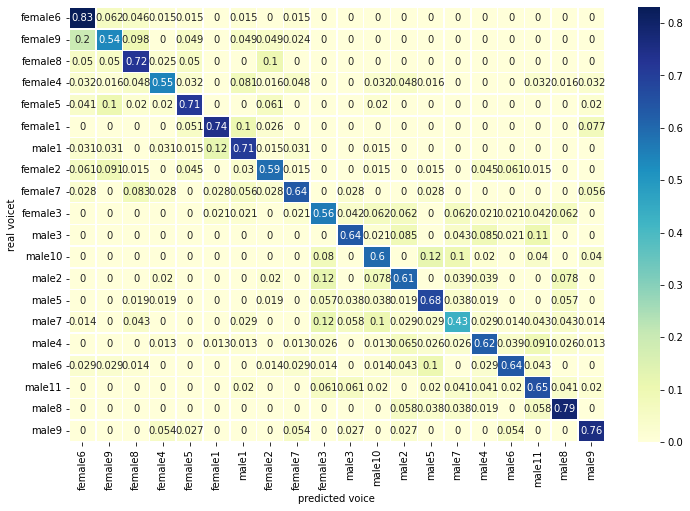

In [19]:
cm2 = confusion_matrix(y_test, y_pre_lg, normalize='true')
cm2 = pd.DataFrame(cm2, index=lb, columns=lb)
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted voice")
plt.ylabel("real voicet")
plt.show()

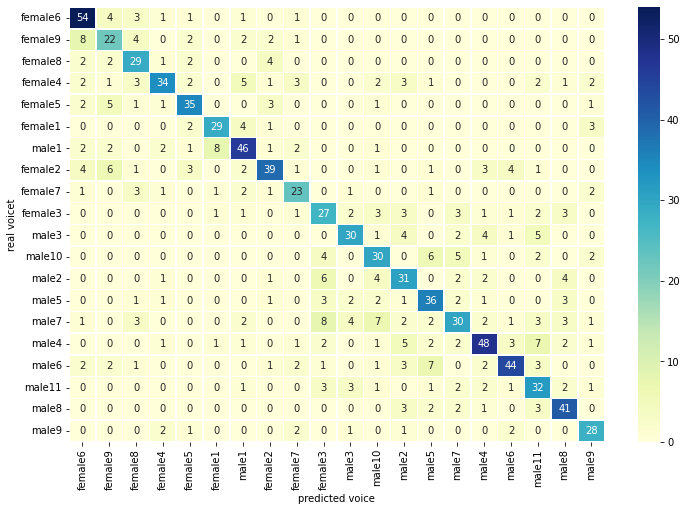

In [20]:
cm2 = confusion_matrix(y_test, y_pre_lg)
cm2 = pd.DataFrame(cm2, index=lb, columns=lb)
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted voice")
plt.ylabel("real voicet")
plt.show()

## **SVM**

In [21]:
from sklearn.svm import SVC

In [22]:
cd /content/gdrive/MyDrive/models/VocalSET/SVM

/content/gdrive/MyDrive/models/VocalSET/SVM


In [23]:
mod_svm = SVC(kernel='linear')
mod_svm.fit(X_train, np.array(y_train).flatten())

SVC(kernel='linear')

In [24]:
y_pre_svm = mod_svm.predict(X_test)

In [25]:
joblib.dump(mod_svm, "svm_mfcc.sav")

['svm_mfcc.sav']

In [26]:
print(classification_report(y_test,y_pre_svm))

              precision    recall  f1-score   support

     female1       0.57      0.85      0.68        65
     female2       0.41      0.49      0.44        41
     female3       0.51      0.80      0.62        40
     female4       0.77      0.58      0.66        62
     female5       0.70      0.61      0.65        49
     female6       0.73      0.69      0.71        39
     female7       0.73      0.62      0.67        65
     female8       0.69      0.58      0.63        66
     female9       0.61      0.53      0.57        36
       male1       0.54      0.65      0.59        48
      male10       0.65      0.66      0.65        47
      male11       0.62      0.66      0.64        50
       male2       0.57      0.65      0.61        51
       male3       0.66      0.77      0.71        53
       male4       0.67      0.42      0.52        69
       male5       0.67      0.58      0.62        77
       male6       0.81      0.61      0.69        69
       male7       0.55    

## **KNN**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
cd /content/gdrive/MyDrive/models/VocalSET/KNN

/content/gdrive/MyDrive/models/VocalSET/KNN


In [29]:
mod_knn = KNeighborsClassifier(n_neighbors=4)

In [30]:
mod_knn.fit(X_train, np.array(y_train).flatten())

KNeighborsClassifier(n_neighbors=4)

In [31]:
joblib.dump(mod_knn, "knn_mfcc.sav")

['knn_mfcc.sav']

In [32]:
y_pre_knn = mod_knn.predict(X_test)

In [33]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

     female1       0.47      0.71      0.57        65
     female2       0.20      0.32      0.25        41
     female3       0.39      0.55      0.46        40
     female4       0.52      0.44      0.47        62
     female5       0.50      0.59      0.54        49
     female6       0.55      0.41      0.47        39
     female7       0.58      0.55      0.57        65
     female8       0.63      0.26      0.37        66
     female9       0.37      0.42      0.39        36
       male1       0.44      0.60      0.51        48
      male10       0.67      0.62      0.64        47
      male11       0.41      0.52      0.46        50
       male2       0.40      0.67      0.50        51
       male3       0.60      0.68      0.64        53
       male4       0.51      0.36      0.42        69
       male5       0.67      0.51      0.58        77
       male6       0.74      0.51      0.60        69
       male7       0.76    

## **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
cd /content/gdrive/MyDrive/models/VocalSET/DTC

/content/gdrive/MyDrive/models/VocalSET/DTC


In [36]:
dtc = DecisionTreeClassifier(max_depth=14)

In [37]:
dtc.fit(X_train, np.array(y_train).flatten())

DecisionTreeClassifier(max_depth=14)

In [38]:
joblib.dump(dtc, "dtc_mfcc.sav")

['dtc_mfcc.sav']

In [39]:
y_pre_dtc = dtc.predict(X_test)

In [40]:
print(classification_report(y_test,y_pre_dtc))

              precision    recall  f1-score   support

     female1       0.40      0.51      0.45        65
     female2       0.14      0.24      0.18        41
     female3       0.34      0.33      0.33        40
     female4       0.42      0.40      0.41        62
     female5       0.40      0.35      0.37        49
     female6       0.26      0.18      0.21        39
     female7       0.44      0.48      0.46        65
     female8       0.39      0.26      0.31        66
     female9       0.23      0.31      0.27        36
       male1       0.29      0.40      0.34        48
      male10       0.50      0.40      0.45        47
      male11       0.41      0.44      0.42        50
       male2       0.34      0.33      0.34        51
       male3       0.36      0.55      0.44        53
       male4       0.25      0.19      0.22        69
       male5       0.47      0.26      0.33        77
       male6       0.68      0.52      0.59        69
       male7       0.45    

## **Random Forests**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
cd /content/gdrive/MyDrive/models/VocalSET/RFC

/content/gdrive/MyDrive/models/VocalSET/RFC


In [43]:
rfc = RandomForestClassifier(n_estimators=400)

In [44]:
rfc.fit(X_train, np.array(y_train).flatten())

RandomForestClassifier(n_estimators=400)

In [45]:
y_pre_rfc = rfc.predict(X_test)

In [46]:
joblib.dump(rfc, "rfc_mfcc.sav")

['rfc_mfcc.sav']

In [47]:
print(classification_report(y_test,y_pre_rfc))

              precision    recall  f1-score   support

     female1       0.72      0.83      0.77        65
     female2       0.40      0.51      0.45        41
     female3       0.71      0.85      0.77        40
     female4       0.83      0.48      0.61        62
     female5       0.67      0.65      0.66        49
     female6       0.78      0.64      0.70        39
     female7       0.74      0.82      0.77        65
     female8       0.83      0.58      0.68        66
     female9       0.80      0.67      0.73        36
       male1       0.76      0.65      0.70        48
      male10       0.80      0.60      0.68        47
      male11       0.56      0.66      0.61        50
       male2       0.61      0.84      0.70        51
       male3       0.55      0.75      0.63        53
       male4       0.81      0.32      0.46        69
       male5       0.68      0.73      0.70        77
       male6       0.65      0.84      0.73        69
       male7       0.57    

## **Gradient Boosting**

In [48]:
import xgboost as xgb

In [49]:
cd /content/gdrive/MyDrive/models/VocalSET/Gradient Boosting

/content/gdrive/MyDrive/models/VocalSET/Gradient Boosting


In [50]:
xgbc = xgb.XGBClassifier(max_depths=5, learning_rate=0.1)

In [51]:
xgbc.fit(X_train, np.array(y_train).flatten())

XGBClassifier(max_depths=5, objective='multi:softprob')

In [52]:
joblib.dump(xgbc, "xgbc_mfcc.sav")

['xgbc_mfcc.sav']

In [53]:
y_pre_xgbc = xgbc.predict(X_test)

In [54]:
print(classification_report(y_test,y_pre_xgbc))

              precision    recall  f1-score   support

     female1       0.72      0.83      0.77        65
     female2       0.41      0.51      0.46        41
     female3       0.59      0.72      0.65        40
     female4       0.88      0.56      0.69        62
     female5       0.67      0.53      0.59        49
     female6       0.69      0.62      0.65        39
     female7       0.73      0.74      0.73        65
     female8       0.66      0.56      0.61        66
     female9       0.59      0.67      0.62        36
       male1       0.57      0.52      0.54        48
      male10       0.83      0.53      0.65        47
      male11       0.52      0.58      0.55        50
       male2       0.56      0.78      0.66        51
       male3       0.65      0.68      0.67        53
       male4       0.64      0.36      0.46        69
       male5       0.70      0.75      0.73        77
       male6       0.65      0.74      0.69        69
       male7       0.62    

## **MLPClassifier**

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
MLPclass = MLPClassifier(hidden_layer_sizes=(512,512), random_state=8, activation='relu', solver="adam", learning_rate_init=0.001, learning_rate='constant')

In [57]:
cd /content/gdrive/MyDrive/models/VocalSET/MLP

/content/gdrive/MyDrive/models/VocalSET/MLP


In [58]:
MLPclass.fit(X_train, np.array(y_train).flatten())
y_pre_MLP = MLPclass.predict(X_test)

In [59]:
joblib.dump(MLPclass, "MLP_mfcc.sav")

['MLP_mfcc.sav']

In [60]:
print(classification_report(y_test,y_pre_MLP))

              precision    recall  f1-score   support

     female1       0.75      0.91      0.82        65
     female2       0.61      0.66      0.64        41
     female3       0.77      0.82      0.80        40
     female4       0.85      0.71      0.77        62
     female5       0.82      0.76      0.79        49
     female6       0.78      0.82      0.80        39
     female7       0.82      0.78      0.80        65
     female8       0.85      0.67      0.75        66
     female9       0.81      0.83      0.82        36
       male1       0.62      0.65      0.63        48
      male10       0.75      0.64      0.69        47
      male11       0.60      0.66      0.63        50
       male2       0.73      0.78      0.75        51
       male3       0.65      0.77      0.71        53
       male4       0.76      0.57      0.65        69
       male5       0.74      0.74      0.74        77
       male6       0.83      0.75      0.79        69
       male7       0.63    